# Wizualna eksploracja danych

W tej sekcji zaprezentowano graficzną analizę danych pochodzących z raportów World Happiness Report. Celem wizualizacji jest identyfikacja istotnych zależności między poziomem szczęścia (*Life Ladder*) a zmiennymi społeczno-ekonomicznymi, takimi jak PKB per capita, wsparcie społeczne czy percepcja korupcji. Każdy wykres został opatrzony interpretacją oraz wnioskami, które pozwalają na formułowanie hipotez badawczych.


In [1]:
#import bibliotek
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as ss
import plotly.graph_objects as g

In [2]:
#ustawienia wykresów
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
#wczytanie danych
df = pd.read_csv("../data/happiness_cleaned.csv")
df.head()

,country,year,life_ladder,gdp_per_capita,social_support,healthy_expectancy,freedom,generosity,corruption,region,missing_per_row
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,South Asia,0
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,South Asia,0
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,South Asia,0
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,South Asia,0
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,South Asia,0


---

In [4]:
#10 najszczesliwyszych krajów
mean_life = df.groupby("country")["life_ladder"].mean().sort_values(ascending=False).reset_index()
top10 = mean_life.head(10)

fig_top = px.bar(
    top10,
    x="life_ladder",
    y="country",
    orientation="h",
    text="life_ladder",
    color_discrete_sequence=["#f3d52e"],
    labels={"life_ladder": "Średni poziom szczęścia", "country": "Kraj"},
    title="10 najszczęśliwszych krajów"
)

fig_top.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_top.update_layout(yaxis={'categoryorder':'total ascending'})
fig_top.show()



**Rysunek 1.**  Wykres słupkowy przedstawia dziesięć krajów o najwyższym średnim poziomie deklarowanego szczęścia, mierzonego za pomocą wskaźnika Life Ladder. 

Wyniki potwierdzają obserwowaną od lat tendencję, zgodnie z którą państwa Europy Północnej, takie jak Finlandia, Dania i Norwegia, plasują się na czołowych pozycjach w rankingach dobrostanu. Wysoki poziom szczęścia w tych krajach można wiązać z wieloma czynnikami, w tym rozwiniętym systemem ochrony zdrowia, wysokim PKB per capita, stabilnością polityczną oraz wysokim poziomem zaufania społecznego. Obserwacja ta podkreśla znaczenie kompleksowych polityk społecznych i ekonomicznych w kształtowaniu subiektywnego dobrostanu mieszkańców.

---

In [5]:
#10 najmniej szczesliwych krajow
bottom10 = mean_life.tail(10)

fig_bottom = px.bar(
    bottom10,
    x="life_ladder",
    y="country",
    orientation="h",
    text="life_ladder",
    color_discrete_sequence=["#f3d52e"],
    labels={"life_ladder": "Średni poziom szczęścia", "country": "Kraj"},
    title="10 najmniej szczęśliwych krajów"
)

fig_bottom.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_bottom.update_layout(yaxis={'categoryorder':'total ascending'})
fig_bottom.show()


**Rysunek 2.** Powyższy wykres prezentuje dziesięć krajów o najniższym średnim poziomie szczęścia. 

Wśród państw z najniższymi wynikami dominują kraje dotknięte konfliktami zbrojnymi, kryzysami gospodarczymi i problemami strukturalnymi. Relatywnie niskie wartości wskaźnika *Life Ladder* mogą odzwierciedlać trudne warunki życia oraz ograniczony dostęp do zasobów materialnych i społecznych.

---

In [6]:
#karogram mapa swiata
mean_happiness = df.groupby("country")["life_ladder"].mean().reset_index()

scale = [
    [0, "#f2f2f2"], 
    [1, "#f3db00"]
]

fig_map = px.choropleth(
    mean_happiness,
    locations="country",
    locationmode="country names",
    color="life_ladder",
    color_continuous_scale=scale,
    title="Średni poziom szczęścia w krajach świata",
    labels={"life_ladder": "Średni Life Ladder"}
)

fig_map.update_geos(
    showframe=False,
    showcoastlines=False,
    projection_type="equirectangular"
)

fig_map.update_layout(
    width=1200,
    height=600
)

fig_map.show()


**Rysunek 3.** Kartogram przedstawia średni poziom szczęścia w krajach świata. 

Obszary o najwyższych wartościach wskaźnika *Life Ladder* koncentrują się w Europie Zachodniej, Ameryce Północnej i Australii, natomiast regiony Afryki Subsaharyjskiej oraz niektóre części Azji wykazują niższe poziomy dobrostanu deklarowanego przez respondentów. Przestrzenna dystrybucja wyników odzwierciedla globalne dysproporcje rozwoju społeczno-ekonomicznego.

---

In [7]:
#boxplot poziomu szczescia w regionach swiata 

fig_box = px.box(
    df,
    x="region",
    y="life_ladder",
    points="all",
    color_discrete_sequence=["#f3d52e"],
    title="Rozkład poziomu szczęścia w regionach świata",
    labels={"region": "Region", "life_ladder": "Life Ladder"}
)
fig_box.update_layout(xaxis_tickangle=-45)

fig_box.show()


**Rysunek 4.** Wykres pudełkowy przedstawia rozkład wartości wskaźnika *Life Ladder* w poszczególnych regionach geograficznych. Dla każdego regionu zaprezentowano medianę, kwartyle, wartości minimalne i maksymalne (poza obserwacjami odstającymi) oraz rozkład indywidualnych obserwacji. Punkty oznaczają wartości deklarowanego poziomu szczęścia w poszczególnych krajach i latach objętych analizą.


Widoczna jest istotna zmienność poziomu szczęścia między regionami świata. Najwyższą medianę oraz najmniejszą rozpiętość rozkładu odnotowano w regionach Australii i Nowej Zelandii oraz Europy Zachodniej, co świadczy o stabilnie wysokim poziomie dobrostanu deklarowanego przez mieszkańców tych obszarów. W regionach Afryki Subsaharyjskiej i Azji Południowej rozkład wartości jest szerszy, a mediany znajdują się na niższym poziomie, co może wskazywać na zróżnicowane warunki życia i większe rozwarstwienie społeczne. Porównanie rozkładów pokazuje, że dobrostan subiektywny jest silnie uwarunkowany czynnikami regionalnymi i kulturowymi. Stabilność i przewidywalność warunków społeczno-ekonomicznych, charakterystyczna dla bardziej rozwiniętych regionów, może przekładać się na bardziej wyrównany poziom szczęścia populacji. Wyniki te podkreślają konieczność uwzględnienia kontekstu geograficznego w analizach porównawczych i interpretacji poziomu dobrostanu.

---

In [8]:
# scatter PKB a poziom szczescia
colors = [
    "#fff9b0",  
    "#ffe066",
    "#ffc14d",
    "#ff9933",
    "#ff6600",
    "#e64a19",
    "#b71c1c"
]

fig_gdp = px.scatter(
    df,
    x="gdp_per_capita",
    y="life_ladder",
    color="region",
    color_discrete_sequence=colors,
    hover_name="country",
    trendline="ols",
    title="Związek PKB per capita a poziom szczęścia",
    labels={"gdp_per_capita": "PKB per capita (log)", "life_ladder": "Life Ladder"}
)
fig_gdp.show()


**Rysunek 5.** Wykres punktowy przedstawia zależność między logarytmem PKB per capita a poziomem deklarowanego szczęścia. 

Widoczna jest silna dodatnia korelacja, co wskazuje, że wyższy poziom zamożności społeczeństw istotnie wiąże się ze wzrostem poziomu dobrostanu. Linię trendu uzyskano metodą regresji liniowej.

---

In [9]:
# scatter wsparcie spoleczne a poziom szczęścia
fig_support = px.scatter(
    df,
    x="social_support",
    y="life_ladder",
    color="region",
    color_discrete_sequence=colors,
    hover_name="country",
    trendline="ols",
    title="Związek wsparcia społecznego a poziom szczęścia",
    labels={"social_support": "Wsparcie społeczne", "life_ladder": "Life Ladder"}
)
fig_support.show()



**Rysunek 6.** Powyższy wykres prezentuje relację między wsparciem społecznym a poziomem szczęścia.

Zauważalna dodatnia zależność sugeruje, że kraje o wyższym poziomie deklarowanego wsparcia społecznego cechują się również wyższym wskaźnikiem *Life Ladder*. Wynik ten potwierdza znaczenie czynników społecznych w kształtowaniu dobrostanu jednostek.


---

In [10]:
#macierz korelacji
cols = [
    "life_ladder",
    "gdp_per_capita",
    "social_support",
    "healthy_expectancy",
    "freedom",
    "generosity",
    "corruption"
]

corr_matrix = df[cols].corr().round(2)

fig_corr = g.Figure(
    data=g.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        # Ustawiamy skalę kolorów Yellow-Orange-Red
        colorscale="YlOrRd",
        zmin=-1,
        zmax=1,
        colorbar=dict(title="Korelacja")
    )
)

fig_corr.update_layout(
    title="Macierz korelacji zmiennych"
)

fig_corr.show()





**Rysunek 7.** Macierz korelacji ilustruje współzależności pomiędzy głównymi zmiennymi ilościowymi w zbiorze danych. 

Najwyższe dodatnie korelacje ze wskaźnikiem szczęścia odnotowano dla PKB per capita oraz wsparcia społecznego. Natomiast zmienna hojności wykazuje słabą zależność z poziomem dobrostanu. Zestawienie wskazuje, że zarówno czynniki ekonomiczne, jak i społeczne, w istotny sposób wiążą się z deklarowanym poziomem szczęścia.

---

## Podsumowanie i wnioski

Przeprowadzona wizualizacja danych pozwoliła na szczegółową eksplorację zależności pomiędzy poziomem deklarowanego szczęścia (*Life Ladder*) a wybranymi zmiennymi społeczno-ekonomicznymi i regionalnymi. Na podstawie przedstawionych wykresów można sformułować następujące kluczowe obserwacje i wnioski:

1. **Zróżnicowanie geograficzne:**  
   Kraje Europy Zachodniej i Północnej charakteryzują się najwyższym średnim poziomem szczęścia, podczas gdy najniższe wartości wskaźnika odnotowano w państwach Afryki Subsaharyjskiej oraz niektórych regionach Azji. Wyniki te potwierdzają utrzymujące się globalne dysproporcje w poziomie dobrostanu subiektywnego.

2. **Wpływ czynników ekonomicznych:**  
   Analiza wykresu rozrzutu wykazała istotną dodatnią korelację pomiędzy PKB per capita a poziomem szczęścia. Wskazuje to, że zamożność społeczeństwa jest ważnym predyktorem jakości życia, choć nie wyczerpuje wszystkich uwarunkowań.

3. **Znaczenie wsparcia społecznego:**  
   Wyraźna dodatnia zależność między wsparciem społecznym a wskaźnikiem *Life Ladder* podkreśla rolę relacji społecznych i poczucia bezpieczeństwa w kształtowaniu dobrostanu jednostek.

4. **Rozkład regionalny i stabilność wyników:**  
   Wizualizacja boxplot potwierdziła, że niektóre regiony, takie jak Europa Zachodnia, cechują się nie tylko wysokim poziomem szczęścia, lecz także niskim zróżnicowaniem wewnętrznym, co może świadczyć o stabilności czynników sprzyjających dobrostanowi.

5. **Macierz korelacji:**  
   Analiza współzależności między zmiennymi potwierdziła, że wskaźnik szczęścia pozostaje w silnym związku z czynnikami gospodarczymi i społecznymi, podczas gdy zmienne takie jak hojność czy percepcja korupcji wykazują słabsze związki z dobrostanem deklarowanym.

Podsumowując, wizualizacje potwierdziły, że poziom szczęścia społeczeństw jest uwarunkowany wieloczynnikowo i podlega znacznym różnicom przestrzennym. Wyniki analizy mogą stanowić podstawę do sformułowania hipotez badawczych oraz dalszych pogłębionych analiz ilościowych, w tym modeli regresji wielorakiej, które pozwolą precyzyjnie określić siłę i kierunek wpływu poszczególnych zmiennych na poziom dobrostanu.


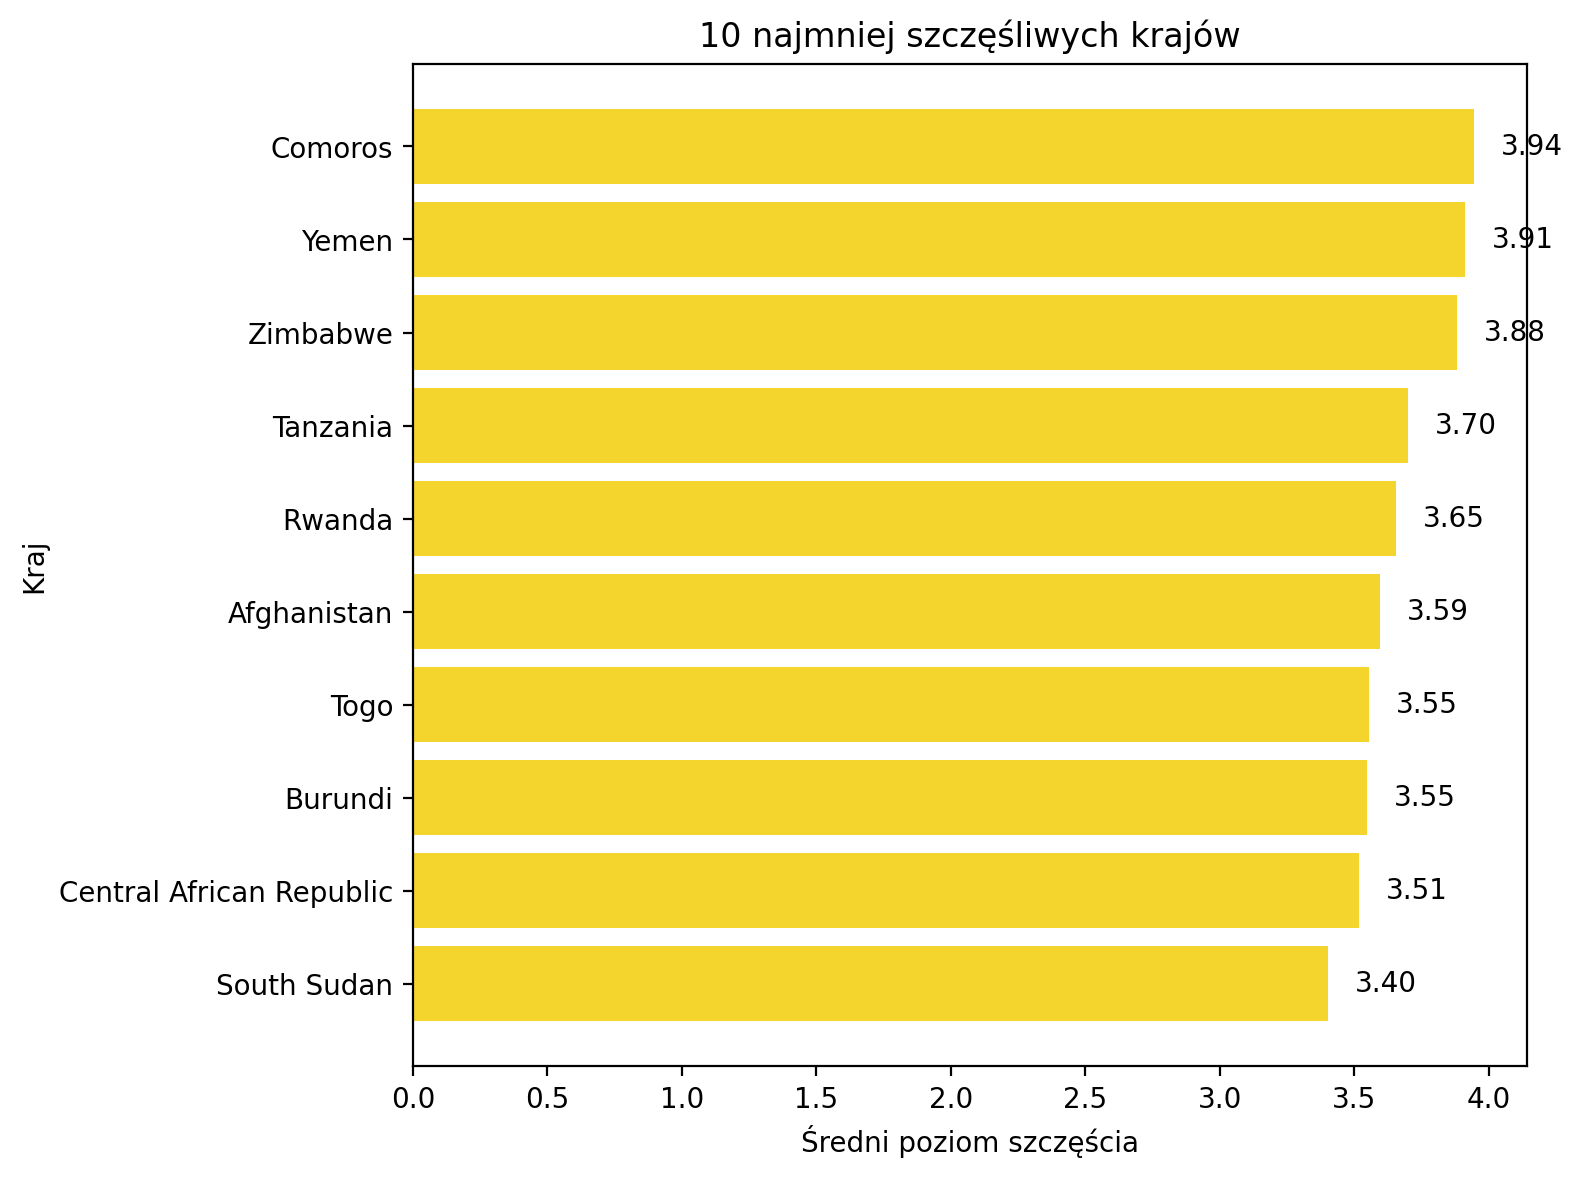

In [11]:
# Sortowanie ascending (od najmniej szczęśliwych)
bottom10_sorted = bottom10.sort_values(by="life_ladder", ascending=True)

# Ustaw wielkość figury
plt.figure(figsize=(8, 6))

# Wykres słupkowy poziomy
bars = plt.barh(
    bottom10_sorted["country"],
    bottom10_sorted["life_ladder"],
    color="#f3d52e"
)

# Dodaj podpisy na końcu słupków
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.1,                   # x
        bar.get_y() + bar.get_height()/2,  # y
        f"{width:.2f}",
        va="center"
    )

# Etykiety osi
plt.xlabel("Średni poziom szczęścia")
plt.ylabel("Kraj")
plt.title("10 najmniej szczęśliwych krajów")

# Dopasuj marginesy
plt.tight_layout()

# Wyświetl
plt.show()